# Text preparation twitter data with python


#### Importing libraries

For this text preparation process we are going to use the NLTK library 

In [1]:
import pandas as pd
import numpy as np
import nltk
import plotly
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.corpus import words as voc_en
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import plotly.express as px

In [2]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("words")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to
[nltk_data]     /home/jsavilaarias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jsavilaarias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /home/jsavilaarias/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jsavilaarias/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/jsavilaarias/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### Reading Twitter Data

In [3]:
path_in = "twitterClimateData.csv"
df = pd.read_csv(path_in, delimiter=";")
df = df[["text", "hashtags"]]
df.head()

,text,hashtags
0,"2020 is the year we #votethemout, the year we ...",#votethemout #climatestrike #rebelforlife
1,Winter has not stopped this group of dedicated...,#climatefriday #climatestrike #ClimateAction
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#ClimateStrike
3,"A year of resistance, as youth protests shaped...",#greta #gretathunberg #climatechange #fridaysf...
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#greta #gretathunberg #climatechange #fridaysf...


#### Text preparation process

The goal of this process is to reduce the number of tokens in order to create the best bag of words

**1) Standard Tokenization**

In [4]:
stop_words_nltk = set(stopwords.words("english"))

In [5]:
# Create a reference variable for Class TweetTokenizer

tk = TweetTokenizer()

In [6]:
df["hashtags"] = df["hashtags"].astype(str)
df["tokens_text"] = df["text"].apply(nltk.word_tokenize)
df["tokes_hashtags"] = df["hashtags"].apply(nltk.word_tokenize)
df["tokens_text_tweet"] = df["text"].apply(lambda x: tk.tokenize(x))
df["tokes_hashtags_tweet"] = df["hashtags"].apply(lambda x: tk.tokenize(x))

In [7]:
df.head()

,text,hashtags,tokens_text,tokes_hashtags,tokens_text_tweet,tokes_hashtags_tweet
0,"2020 is the year we #votethemout, the year we ...",#votethemout #climatestrike #rebelforlife,"[2020, is, the, year, we, #, votethemout, ,, t...","[#, votethemout, #, climatestrike, #, rebelfor...","[2020, is, the, year, we, #votethemout, ,, the...","[#votethemout, #climatestrike, #rebelforlife]"
1,Winter has not stopped this group of dedicated...,#climatefriday #climatestrike #ClimateAction,"[Winter, has, not, stopped, this, group, of, d...","[#, climatefriday, #, climatestrike, #, Climat...","[Winter, has, not, stopped, this, group, of, d...","[#climatefriday, #climatestrike, #ClimateAction]"
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#ClimateStrike,"[WEEK, 55, of, #, ClimateStrike, at, the, @, U...","[#, ClimateStrike]","[WEEK, 55, of, #ClimateStrike, at, the, @UN, ....",[#ClimateStrike]
3,"A year of resistance, as youth protests shaped...",#greta #gretathunberg #climatechange #fridaysf...,"[A, year, of, resistance, ,, as, youth, protes...","[#, greta, #, gretathunberg, #, climatechange,...","[A, year, of, resistance, ,, as, youth, protes...","[#greta, #gretathunberg, #climatechange, #frid..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#greta #gretathunberg #climatechange #fridaysf...,"[HAPPY, HOLIDAYS, #, greta, #, gretathunberg, ...","[#, greta, #, gretathunberg, #, climatechange,...","[HAPPY, HOLIDAYS, #greta, #gretathunberg, #cli...","[#greta, #gretathunberg, #climatechange, #frid..."


In [8]:
# Tokenize todo el contenido de 'text_tweet'
all_tokens_text_tweet = []
for t in df["tokens_text_tweet"]:
    all_tokens_text_tweet.extend(t)

In [9]:
# Tokenize todo el contenido de 'text'
all_tokens_text = []
for t in df["tokens_text"]:
    all_tokens_text.extend(t)

In [10]:
# Tokenize todo el contenido de 'hashtags'
all_tokens_hashtags = []
for t in df["tokes_hashtags"]:
    all_tokens_hashtags.extend(t)

In [11]:
# Tokenize todo el contenido de 'hashtags_tweet'
all_tokens_hashtags_tweet = []
for t in df["tokes_hashtags_tweet"]:
    all_tokens_hashtags_tweet.extend(t)

In [12]:
print("all_tokens_text =", len(all_tokens_text))
print("all_tokens_hashtags =", len(all_tokens_hashtags))
print("all_tokens_text_tweet =", len(all_tokens_text_tweet))
print("all_tokens_hashtags_tweet =", len(all_tokens_hashtags_tweet))

all_tokens_text = 2332507
all_tokens_hashtags = 580275
all_tokens_text_tweet = 1917299
all_tokens_hashtags_tweet = 290245


#### Creating first BoW

Removing special caracter, stopwords and transformig the text in lowercase

In [42]:
# process for text

tokens_text = [w.lower() for w in all_tokens_text if len(w) > 1]
tokens_text = [w for w in tokens_text if w.isalpha()]
tokens_text = [w for w in tokens_text if w not in stop_words_nltk]
fdist = nltk.FreqDist(tokens_text)
topwords = fdist.most_common(20)
print("Size of new BoW text =", len(fdist))
x, y = zip(*topwords)
fig = px.bar(x=x, y=y, title = "BoW text", labels = {"x":"Text", "y":"Frecuency"})
fig.update_xaxes(tickangle=270)
fig.show()

Size of new BoW text = 71977


In [40]:
# process for text_tweet

tokens_text_tweet = [w.lower() for w in all_tokens_text_tweet if len(w) > 1]
tokens_text_tweet = [w for w in tokens_text_tweet if w.isalpha()]
tokens_text_tweet = [w for w in tokens_text_tweet if w not in stop_words_nltk]
fdist = nltk.FreqDist(tokens_text_tweet)
topwords = fdist.most_common(20)
print("Size of new BoW text_tweet =", len(fdist))
x, y = zip(*topwords)
fig = px.bar(x=x, y=y, title = "BoW text_tweet", labels = {"x":"Text_tweet", "y":"Frecuency"})
fig.update_xaxes(tickangle=270)
fig.show()

Size of new BoW text_tweet = 38698


In [39]:
# process for hashtags

tokens_hashtags = [w.lower() for w in all_tokens_hashtags if len(w) > 1]
tokens_hashtags = [w for w in tokens_hashtags if w.isalpha()]
tokens_hashtags = [w for w in tokens_hashtags if w not in stop_words_nltk]
fdist = nltk.FreqDist(tokens_hashtags)
topwords = fdist.most_common(20)
print("Size of new BoW hashtags =", len(fdist))
x, y = zip(*topwords)
fig = px.bar(x=x, y=y, title = "BoW hashtags", labels = {"x":"Hashtags", "y":"Frecuency"})
fig.update_xaxes(tickangle=270)
fig.show()

Size of new BoW hashtags = 28912


In [44]:
# process for hashtags_tweet

tokens_hashtags_tweet = [w.lower() for w in all_tokens_hashtags_tweet if len(w) > 1]
#tokens_hashtags_tweet = [w for w in tokens_hashtags_tweet if w.isalpha()]
tokens_hashtags_tweet = [w for w in tokens_hashtags_tweet if w not in stop_words_nltk]
fdist = nltk.FreqDist(tokens_hashtags_tweet)
topwords = fdist.most_common(20)
print("Size of new BoW hashtags_tweet =", len(fdist))
x, y = zip(*topwords)
fig = px.bar(x=x, y=y, title = "BoW hashtags_tweet", labels = {"x":"Hashtags", "y":"Frecuency"})
fig.update_xaxes(tickangle=270)
fig.show()

Size of new BoW hashtags_tweet = 31225


### The tokenization process was better with the Twiter library. For that reason we continue the text preparation process with those BoW 

**2) Stemming**

We tried to use Porter, but Lancaster was better.

In [48]:
# Stemming con NLTK

porter = PorterStemmer()
lancaster = LancasterStemmer()

# tokens_text = [porter.stem(w) for w in tokens_text]
tokens_text = [lancaster.stem(w) for w in tokens_text_tweet]

fdist = nltk.FreqDist(tokens_text)
topwords = fdist.most_common(20)
print("Size of new BoW text Stemming =", len(fdist))
x, y = zip(*topwords)
# plt.figure(figsize=(15, 10))
# plt.bar(x, y)
# plt.xticks(rotation=90)
# plt.show()
fig = px.bar(x=x, y=y, title = "BoW text_tweet Stemming", labels = {"x":"Text", "y":"Frecuency"})
fig.update_xaxes(tickangle=270)
fig.show()

Size of new BoW text Stemming = 24165


In [58]:
# Stemming con NLTK

porter = PorterStemmer()
lancaster = LancasterStemmer()

#listax = [x.replace("#","") for x in tokens_hashtags_tweet]
#tokens_hashtags = [porter.stem(w) for w in listax]
tokens_hashtags = [lancaster.stem(w) for w in tokens_hashtags_tweet]

fdist = nltk.FreqDist(tokens_hashtags)
topwords = fdist.most_common(20)
print("Size of new BoW hashtags =", len(fdist))
x, y = zip(*topwords)
# plt.figure(figsize=(15, 10))
# plt.bar(x, y)
# plt.xticks(rotation=90)
# plt.show()
fig = px.bar(x=x, y=y, title = "BoW text_hashtags Stemming", labels = {"x":"Hashtags", "y":"Frecuency"})
fig.update_xaxes(tickangle=270)
fig.show()

Size of new BoW hashtags = 31225


**3) Lemmatization**

Size of new BoW text = 23951


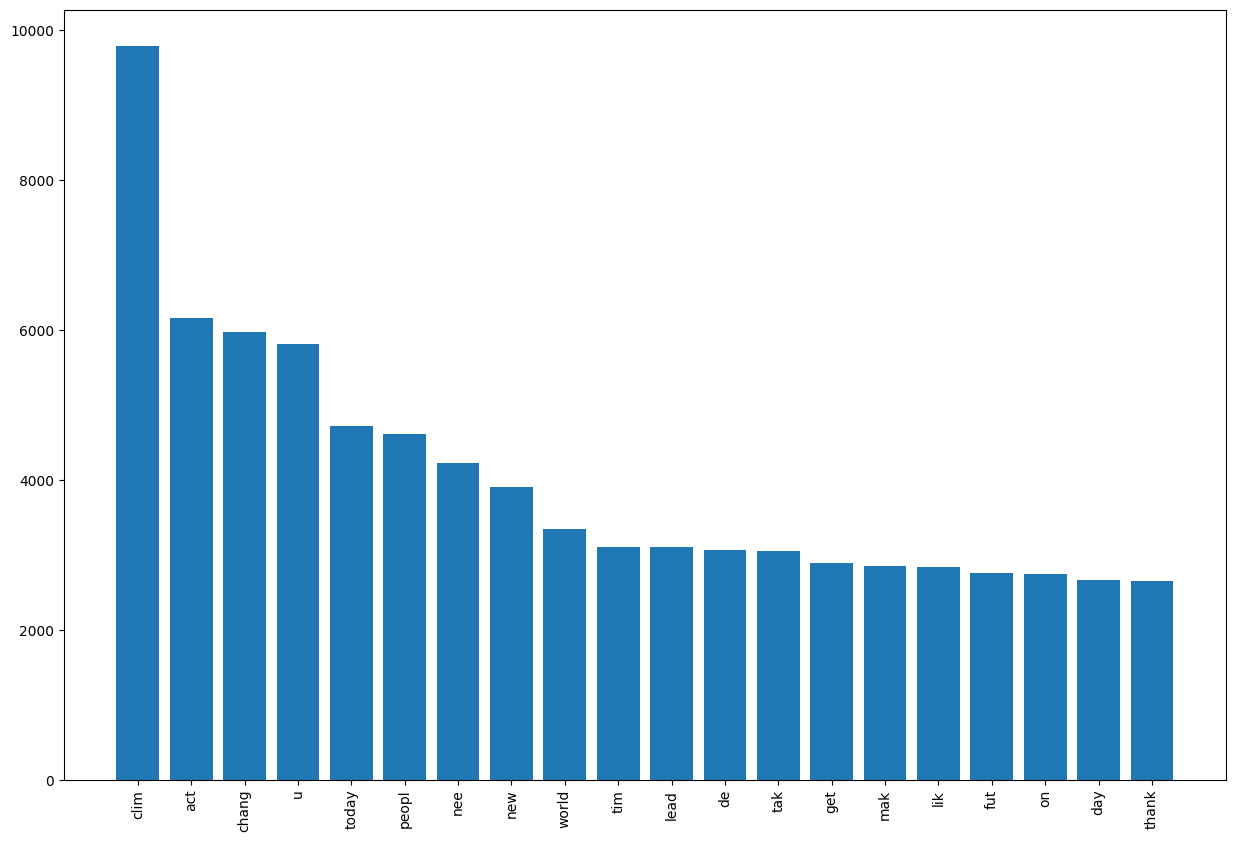

In [59]:
# Lemmatization con NLTK

wordnet_lemmatizer = WordNetLemmatizer()

# tokens_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens_text ]
tokens_text = [wordnet_lemmatizer.lemmatize(w) for w in tokens_text]

fdist = nltk.FreqDist(tokens_text)
topwords = fdist.most_common(20)
print("Size of new BoW text =", len(fdist))
x, y = zip(*topwords)
plt.figure(figsize=(15, 10))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

Size of new BoW hashtags = 30597


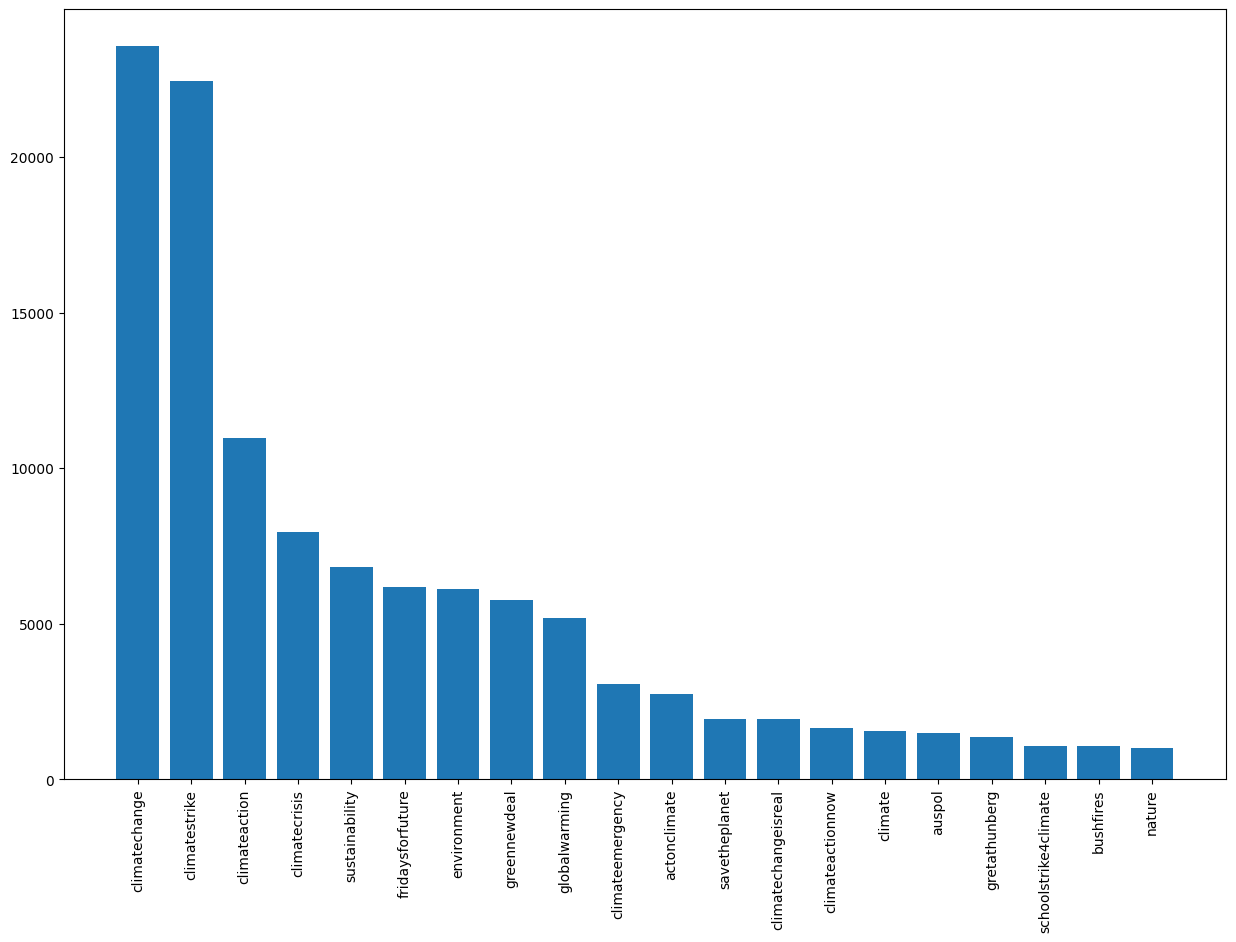

In [60]:
# Lemmatization con NLTK

wordnet_lemmatizer = WordNetLemmatizer()

listax = [x.replace("#","") for x in tokens_hashtags]
# tokens_hastags = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens_hastags ]
tokens_hashtags = [wordnet_lemmatizer.lemmatize(w) for w in listax]

fdist = nltk.FreqDist(tokens_hashtags)
topwords = fdist.most_common(20)
print("Size of new BoW hashtags =", len(fdist))
x, y = zip(*topwords)
plt.figure(figsize=(15, 10))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()